In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
# Load preprocessed data
x_input = np.load('prepared_data/x_input_combined.npy')
y_output = np.load('prepared_data/y_output_combined.npy')

y_output = to_categorical(y_output, num_classes=4)

In [28]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices()
print("Physical Devices:", physical_devices)

TensorFlow version: 2.16.1
Num GPUs Available:  0
Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [29]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_input, y_output, test_size=0.2, random_state=42)


In [30]:
# Build the DenseNet model
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Display the summary of the model
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 8,091,204 (30.87 MB)

 Trainable params: 8,007,556 (30.55 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [31]:
# Optionally freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_val, y_val)
)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5567 - loss: 1.4568 - val_accuracy: 0.8359 - val_loss: 0.4350
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8699 - loss: 0.3703 - val_accuracy: 0.8385 - val_loss: 0.3680
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9197 - loss: 0.2648 - val_accuracy: 0.8984 - val_loss: 0.2772
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9398 - loss: 0.1865 - val_accuracy: 0.9219 - val_loss: 0.2129
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9606 - loss: 0.1372 - val_accuracy: 0.9297 - val_loss: 0.1929
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9759 - loss: 0.0909 - val_accuracy: 0.9323 - val_loss: 0.1818
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9840 - loss: 0.0762 - val_accuracy: 0.9036 - val_loss: 0.2262
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9531 - loss: 0.1355 - val_accuracy: 0.9479 - val_loss:

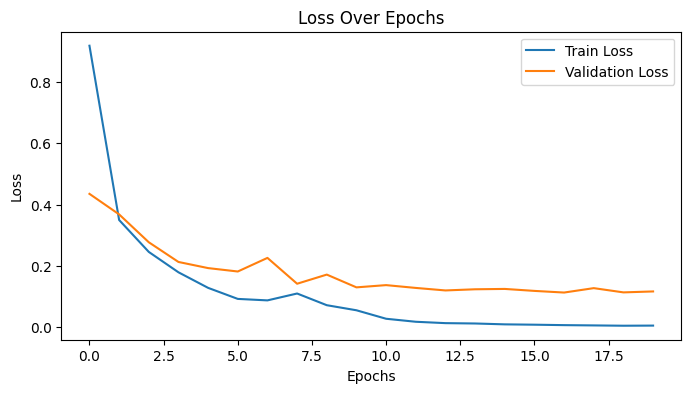

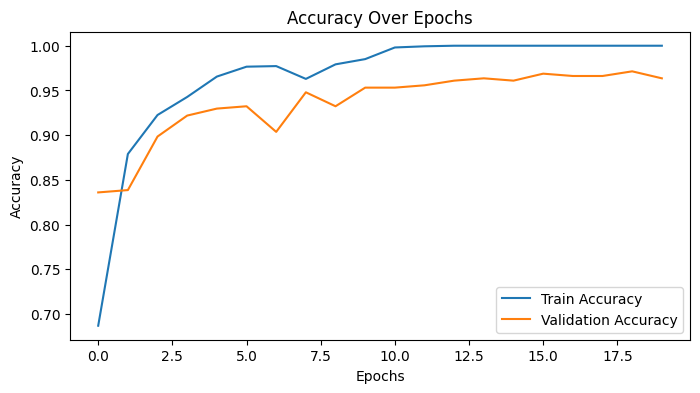

In [32]:
def plot_metrics(history):
    # Plot Loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_metrics(history)

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 800ms/step


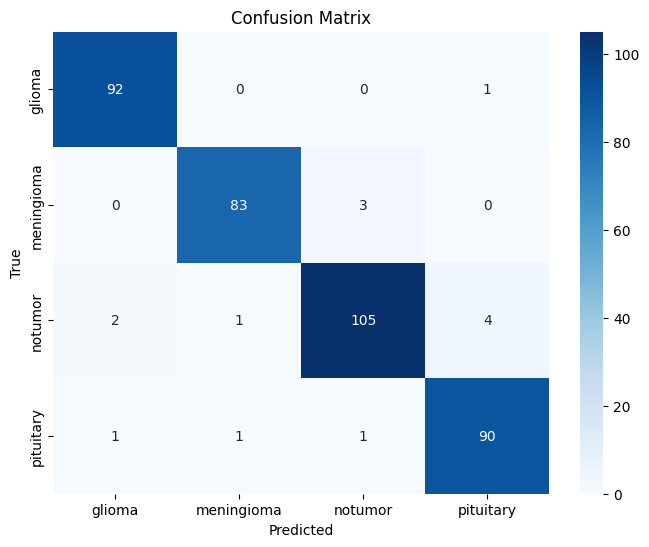

Accuracy: 0.9635416666666666
Precision: 0.9638907035532706
Recall: 0.9649013815953988
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.98      0.97      0.97        86
           2       0.96      0.94      0.95       112
           3       0.95      0.97      0.96        93

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384



In [33]:
# Make predictions
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Confusion Matrix and Classification Report

class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", class_report)